In [1]:
# Importing the libraries
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('listings_prepar.csv', sep=',')
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,65.0,1.0,53.0,831.0,0.0,0.0,1.0,0.0,70.0
1,33.0,2.0,48.0,1247.0,0.0,0.0,1.0,0.0,17.0
2,64.0,1.0,301.0,890.0,1.0,0.0,0.0,0.0,115.0
3,8.0,1.0,0.0,1658.0,0.0,0.0,1.0,0.0,54.0
4,38.0,3.0,337.0,890.0,1.0,0.0,0.0,0.0,90.0
...,...,...,...,...,...,...,...,...,...
3839,19.0,2.0,144.0,889.0,0.0,0.0,1.0,0.0,169.0
3840,40.0,8.0,317.0,922.0,0.0,0.0,0.0,1.0,149.0
3841,14.0,1.0,267.0,879.0,1.0,0.0,0.0,0.0,80.0
3842,73.0,2.0,51.0,822.0,1.0,0.0,0.0,0.0,180.0


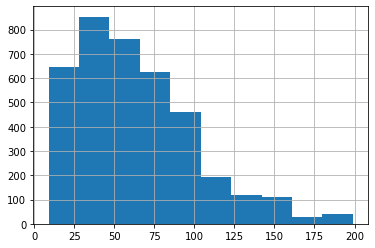

In [3]:
df.price.hist()

In [5]:
#попробуем оценить, является ли квартира "элитной" при учете остальных параметров
#для этого установим цену в 60 долларов - будет деление примерно пополам, что позволит лучше натренировать нашу модель
#фичи остаются те же, что и были отобраны для регрессии
df['lux_pr'] = [int(i > 60) for i in df['price']]
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price,lux_pr
0,65.0,1.0,53.0,831.0,0.0,0.0,1.0,0.0,70.0,1
1,33.0,2.0,48.0,1247.0,0.0,0.0,1.0,0.0,17.0,0
2,64.0,1.0,301.0,890.0,1.0,0.0,0.0,0.0,115.0,1
3,8.0,1.0,0.0,1658.0,0.0,0.0,1.0,0.0,54.0,0
4,38.0,3.0,337.0,890.0,1.0,0.0,0.0,0.0,90.0,1
...,...,...,...,...,...,...,...,...,...,...
3839,19.0,2.0,144.0,889.0,0.0,0.0,1.0,0.0,169.0,1
3840,40.0,8.0,317.0,922.0,0.0,0.0,0.0,1.0,149.0,1
3841,14.0,1.0,267.0,879.0,1.0,0.0,0.0,0.0,80.0,1
3842,73.0,2.0,51.0,822.0,1.0,0.0,0.0,0.0,180.0,1


In [6]:
df = df.drop(columns = ['price'], );
df = df.drop(columns = ['room_type=0'], );
df = df.drop(columns = ['room_type=1'], );
df = df.drop(columns = ['room_type=2'], );
df = df.drop(columns = ['room_type=3'], );

In [7]:
#Statistics
df.describe()

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,lux_pr
count,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000
mean,35.188085,2.190166,136.689126,1102.677940,0.453434
std,29.454680,1.956992,134.421569,397.733788,0.497892
min,1.000000,1.000000,0.000000,817.000000,0.000000
25%,8.000000,1.000000,0.000000,838.000000,0.000000
50%,28.000000,1.000000,86.000000,903.000000,0.000000
75%,59.000000,3.000000,274.250000,1248.250000,1.000000
max,99.000000,9.000000,365.000000,3636.000000,1.000000


In [8]:
#splitting test and train sets 
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [9]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
#baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.678661
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.012     
Dependent Variable: y                AIC:              4181.7638 
Date:               2021-12-13 18:34 BIC:              4205.8880 
No. Observations:   3075             Log-Likelihood:   -2086.9   
Df Model:           3                LL-Null:          -2111.6   
Df Residuals:       3071             LLR p-value:      1.0744e-10
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.0982      0.0430     2.2838    0.0224     0.0139     0.1824
x2     0.1185      0.0381     3.1099    0.0019     0.0

In [11]:
#feature selection
X_train = X_train[:,[1,2]]
X_test = X_test[:,[1,2]]

In [12]:
from sklearn.linear_model import LogisticRegression
slr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [13]:
y_pred = slr.predict(X_test)
slr.score(X_test,y_test)

0.5240572171651495

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[328  61]
 [305  75]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


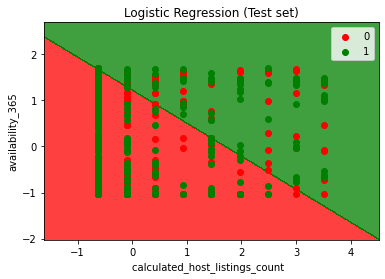

In [15]:
#plot
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, slr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('calculated_host_listings_count  ')
plt.ylabel('availability_365')
plt.legend()
plt.show()

In [16]:
#output file
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data4.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [ ]:
#модель явно делает крен в сторону ошибки первого рода - то есть считает большинство квартир недорогими
#это очевидно и понятно почему - эти параметры действительно не являются ключевыми при создании базовой цены
#так же это напоминает нам о том, что крутые крвартиры чаще всего реже заняты - спрос на рынке среднего сегмента выше
#поэтому и многие параметры тоже выше у квартир с